In [412]:
import numpy as np
import matplotlib.pyplot as plt

In [413]:
x = np.empty((100,2))
x.shape

(100, 2)

In [414]:
x[:,0] = np.random.uniform(0.,100.,size=100)
x[:,1] = x[:,0]*3.+4.+np.random.normal(0.,10.,size=100)
# x[:,1] = x[:,0]*3.+4.

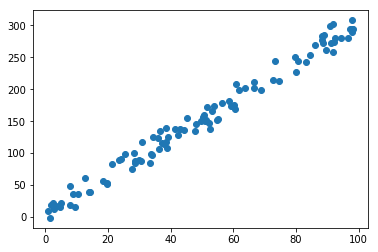

In [415]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [416]:
def getx(x):
    return x - np.mean(x,axis=0)

In [417]:
x = getx(x=x)
len(x)

100

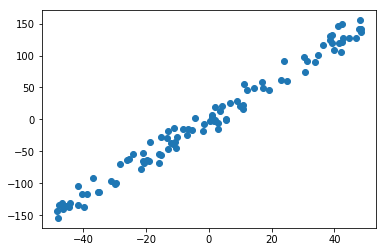

In [418]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [419]:
def distance(x,theta):
    return np.sum(x.dot(theta)**2.)/len(x)

In [420]:
def gradient_math(x,theta):
    return 2.*x.T.dot(x.dot(theta))/len(x)

In [421]:
# np.linalg.norm:求一个向量的模
def direct(theta):
    return theta/np.linalg.norm(theta)

In [422]:
def DJ_debug(theta,x,epsilon = 0.01):
    res = np.empty(len(theta))
    for i in range(len(theta)):              
        theta1 = theta.copy()
        theta1[i] += epsilon 
        theta2 = theta.copy()
        theta2[i] -= epsilon
        res[i] = (distance(theta = theta1,x = x)-distance(theta = theta2,x = x))/(2*epsilon)
    return res



In [423]:
# 参数名 使用的梯度计算函数，数据x,需要的矩阵w，学习率eta,训练的轮数n_iters,误差值epsilon
def gradient_asent(x,theta,eta,n_iters = 1e4,epsilon = 1e-8):
    # plt.scatter(x[:,0],x[:,1])
    theta_new = direct(theta)
    n_iter = 0
    while n_iter<n_iters:
        last_theta = theta_new
        gradient = gradient_math(x = x,theta = theta_new)
        theta_new = theta_new + eta*gradient
        theta_new = direct(theta_new)
        if abs(distance(x,theta_new)-distance(x,last_theta))<epsilon:
            break
        n_iter += 1
    return theta_new

In [424]:
eta = 0.01
initial_theta = np.random.random(x.shape[1])
theta = gradient_asent(x=x,theta=initial_theta,eta = eta)
theta

array([0.31445556, 0.9492722 ])

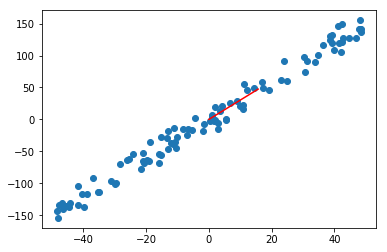

In [425]:
plt.scatter(x[:,0],x[:,1])
plt.plot([0,theta[0]*50],[0,theta[1]*50],color = 'red')
plt.show()

In [426]:
theta

array([0.31445556, 0.9492722 ])

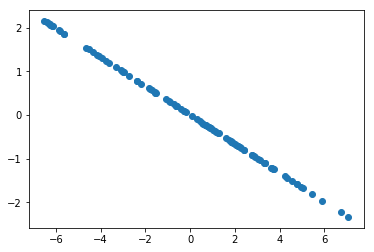

In [427]:
x2 = x-x.dot(theta).reshape(-1,1)*theta
plt.scatter(x2[:,0],x2[:,1])
plt.show()

In [428]:
eta = 0.01
initial_theta1 = np.random.random(x.shape[1])
w2 = gradient_asent(x=x2,theta=initial_theta1,eta = eta)
w2

array([ 0.94928303, -0.31442286])

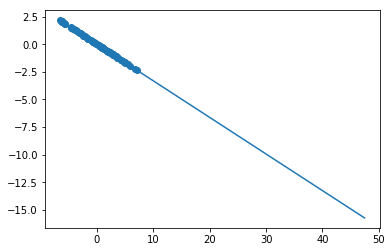

3.444893617271516e-05

In [431]:
plt.scatter(x2[:,0],x2[:,1])
plt.plot([0,w2[0]*50],[0,w2[1]*50])
plt.show()
y = theta.dot(w2)
y